In [1]:
import numpy as np
import openpnm as op
np.random.seed(10)
ws = op.Workspace()
ws.settings["loglevel"] = 40
np.set_printoptions(precision=5)

pn = op.network.Cubic(shape=[20, 20, 20], spacing=0.00005)

In [2]:
geo = op.geometry.StickAndBall(network=pn, pores=pn.Ps, throats=pn.Ts)
hg = op.phases.Mercury(network=pn, name='mercury')

phys = op.physics.GenericPhysics(network=pn, phase=hg, geometry=geo)
phys.add_model(propname='throat.entry_pressure',
               model=op.models.physics.capillary_pressure.washburn)

print(pn.project.grid)

+Project: sim_01-----------+
|   net_01   |   mercury   |
+------------+-------------+
|   geo_01   |   phys_01   |
+------------+-------------+


In [3]:
mip = op.algorithms.Porosimetry(network=pn, phase=hg)
mip.set_inlets(pores=pn.pores('back'))
mip.run()

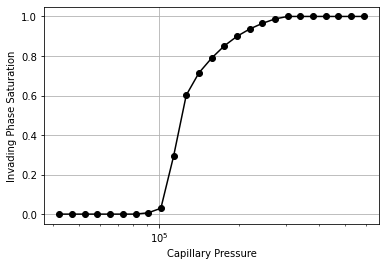

In [4]:
#NBVAL_IGNORE_OUTPUT
fig = mip.plot_intrusion_curve()


In [5]:
Pc, Snwp = mip.get_intrusion_data()
print(Pc, Snwp)


[ 42142.40196  47030.17163  52484.83572  58572.14391  65365.47166
  72946.7047   81407.22604  90849.0175  101385.88896 113144.85026
 126267.64209 140912.44455 157255.78382 175494.66001 195848.92168
 218563.91598 243913.44593 272203.07084 303773.78948 339006.15041
 378324.83906 422203.79682 471171.93387 525819.50455 586805.22225] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006663680170228563, 0.029557076250931905, 0.2922910321871031, 0.6015780625675873, 0.7144536858425853, 0.7890446004531194, 0.8510852707172183, 0.8993157761187267, 0.9363213760435675, 0.9649411782335564, 0.9873089340667308, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
